In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [5]:
X=df.drop('benign_0__mal_1',axis=1)
y=df['benign_0__mal_1']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [8]:
X_train.shape

(426, 30)

In [9]:
type(X_train), type(y_test)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
type(X_train),X_train.shape

(numpy.ndarray, (426, 30))

In [14]:
X_test=scaler.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [16]:
model=Sequential()

In [17]:
X_train.shape  ###30 features so 30 neuron tobe added

(426, 30)

In [18]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#### for Binary classification activation will be sigmoid
Dense
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [20]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,workers=5,use_multiprocessing=True)

Epoch 1/600
14/14 [==============================] - 3s 54ms/step - loss: 0.6603 - val_loss: 0.6454
Epoch 2/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6341 - val_loss: 0.6208
Epoch 3/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6082 - val_loss: 0.5930
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5769 - val_loss: 0.5565
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5371 - val_loss: 0.5133
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4927 - val_loss: 0.4656
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4460 - val_loss: 0.4155
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3988 - val_loss: 0.3672
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3575 - val_loss: 0.3292
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3202 - val_loss: 0.2937
E

In [21]:
df_loss=pd.DataFrame(model.history.history)

<Axes: >

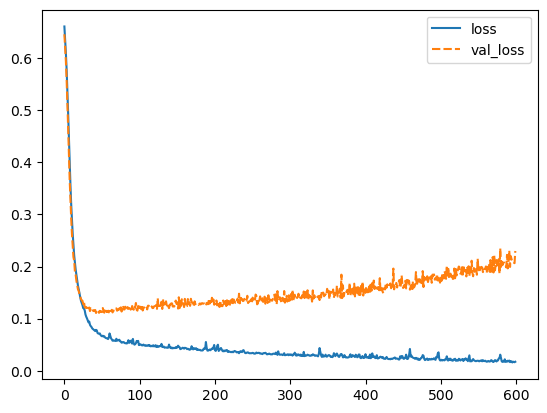

In [22]:
sns.lineplot(df_loss)  ###validation loss start increasing for overfitting after some point

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [4]:
early=EarlyStopping( monitor='val_loss',mode='min')     ##,patience=25

In [12]:
model=Sequential()

In [14]:
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',loss='BinaryCrossentropy')

In [28]:
model.fit(x=X_test,y=y_test,validation_data=(X_train,y_train),callbacks=[early],epochs=600,workers=5,use_multiprocessing=True)

Epoch 1/600
5/5 [==============================] - 2s 108ms/step - loss: 0.6939 - val_loss: 0.6616
Epoch 2/600
5/5 [==============================] - 0s 31ms/step - loss: 0.6953 - val_loss: 0.6540
Epoch 3/600
5/5 [==============================] - 0s 30ms/step - loss: 0.6772 - val_loss: 0.6465
Epoch 4/600
5/5 [==============================] - 0s 31ms/step - loss: 0.6507 - val_loss: 0.6387
Epoch 5/600
5/5 [==============================] - 0s 31ms/step - loss: 0.6706 - val_loss: 0.6309
Epoch 6/600
5/5 [==============================] - 0s 28ms/step - loss: 0.6509 - val_loss: 0.6227
Epoch 7/600
5/5 [==============================] - 0s 30ms/step - loss: 0.6372 - val_loss: 0.6137
Epoch 8/600
5/5 [==============================] - 0s 27ms/step - loss: 0.6351 - val_loss: 0.6048
Epoch 9/600
5/5 [==============================] - 0s 30ms/step - loss: 0.6256 - val_loss: 0.5954
Epoch 10/600
5/5 [==============================] - 0s 31ms/step - loss: 0.6401 - val_loss: 0.5856
Epoch 11/600
5/5 [

In [29]:
df_loss=pd.DataFrame(model.history.history)

<Axes: >

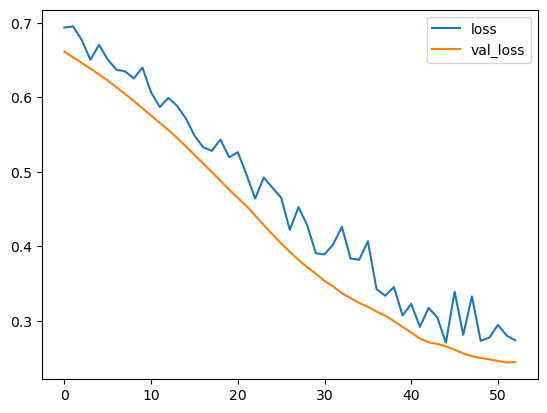

In [30]:
df_loss.plot()